In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv("peakhash.csv")

In [3]:
def cleanTags(tag):
    tag = tag.replace("#","")
    tag = tag.lower()
    return tag

In [4]:
df["Hastag"] = df["Hastag"].apply(cleanTags)

In [5]:
badTags = ["india", "pune", "uk", "dehi", "australia"]
df = df[~df["Hastag"].isin(badTags)]

In [6]:
df['Date'] = pd.to_datetime(df['Date Created'])

In [7]:
numtags = 10
tags = list(dict(df["Hastag"].value_counts()[:numtags]).keys())

In [8]:
#byMonth and chart the 5
tagCounts = {}
for tag in tags:
    monthCount = []
    for i in range(12):
        monthCount.append(len(df[(df["Hastag"] == tag) & (df["Date"].dt.month == i+1)]))
    tagCounts[tag] = monthCount

In [9]:
tags

['covid19',
 'covid',
 'coronavirus',
 'whatshappeninginmyanmar',
 'vaccine',
 'lockdown',
 'pandemic',
 'corona',
 'wearamask',
 'breaking']

In [10]:
timeline = pd.read_csv('covidTimeline.csv')
timeline['date'] = pd.to_datetime(timeline['date']).dt.date

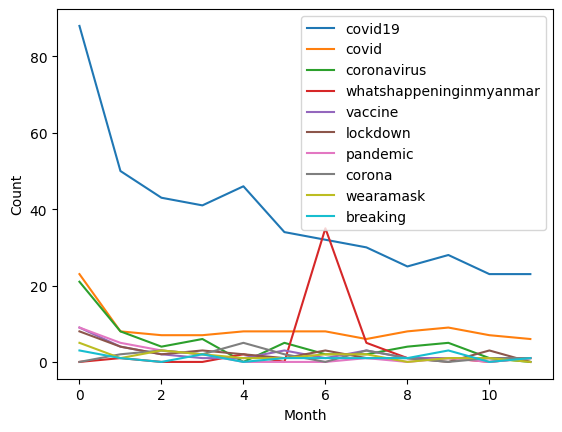

In [11]:
y = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep" , "Oct", "Nov", "Dec"]
for tag in tags:
    plt.plot(tagCounts[tag], label = tag)
plt.ylabel("Count")
plt.xlabel("Month")
#plt.figure(figsize=(8, 6), dpi=80)
plt.legend()
plt.show()

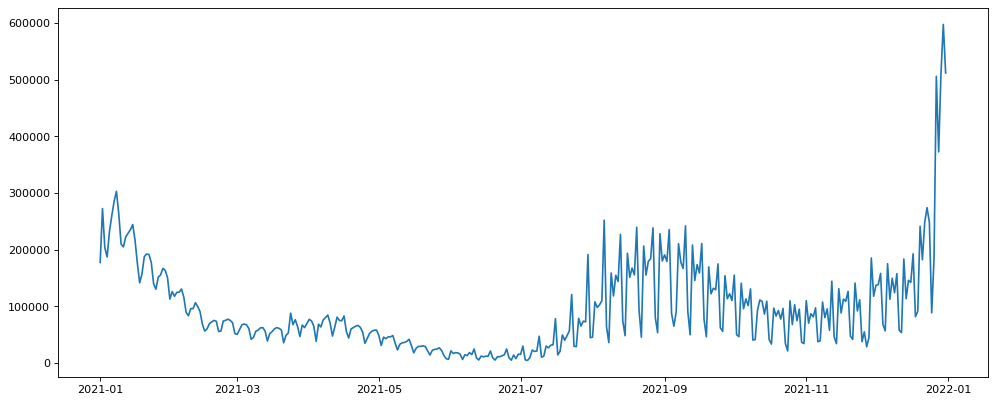

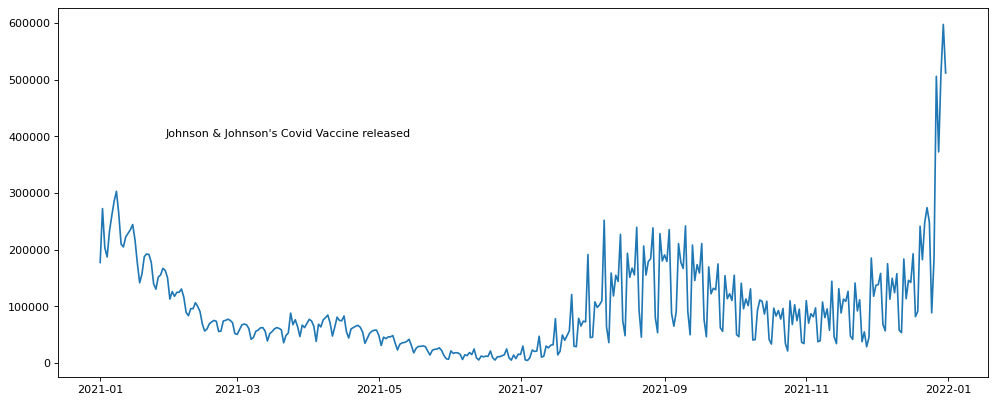

In [18]:
covidData = pd.read_csv("owid-covid-data.csv")
covidData = covidData[(covidData['location'] == 'United States') & (covidData['date'].str.contains('2021'))]
covidData['date'] = pd.to_datetime(covidData['date']).apply(lambda day: day.date())
figure(figsize=(15, 6), dpi=80)
plt.plot(covidData['date'], covidData['new_cases'])


#for i, row in timeline.iterrows():
#    covidVal = min(list(covidData['date']), key=lambda x: abs(x - row['date']))
#    plt.text(row['date'], covidVal, row['event'])
plt.text(timeline['date'][0], 400000, timeline['event'][0])

plt.show()

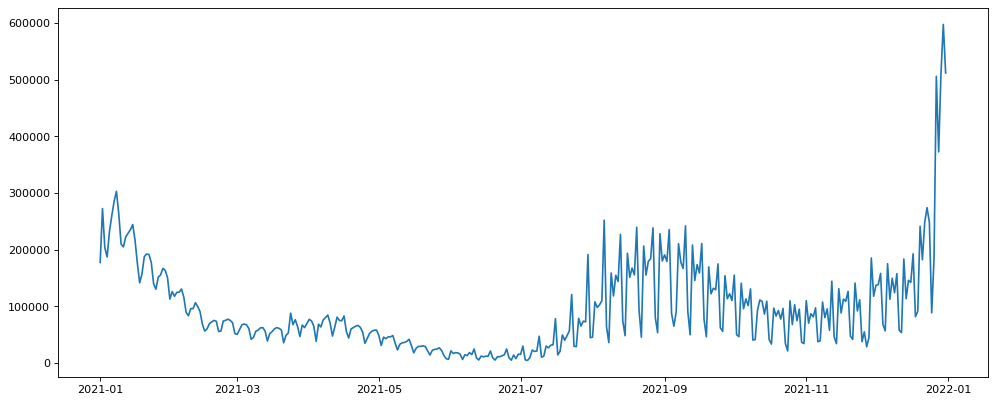

In [13]:
figure(figsize=(15, 6), dpi=80)
plt.plot(covidData['date'], covidData['new_cases'])
plt.show()

In [14]:
timeline

,date,event,link
0,2021-01-29,Johnson & Johnson's Covid Vaccine released,https://www.devex.com/organizations/johnson-jo...
1,2021-01-30,One year since WHO declared public health emer...,NaN
2,2021-01-04,Alpha variant shows up in New York,NaN
3,2021-03-02,Texas and Mississippi annouce opening,NaN
4,2021-03-11,Biden announces plans to make vaccines availab...,NaN
5,2021-05-13,CDC says that fully vaccinated people don't ne...,NaN
6,2021-07-07,Delta Variant becomes the most prominent strain,NaN
7,2021-12-01,Omicron shows up in the United states,NaN
8,2021-09-10,Biden mandates Covid-19 vaccines for federal w...,NaN
9,2021-04-19,Vaccine eligibility opens to all adults in the US,NaN
